# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants me factors. 

Essentially, the companyWhich variables are significant in predicting the demand for shared bikes.throHow well those variables describe the bike demandsthroBased on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. ouse prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bikesharing = pd.read_csv("C:\\Users\\SONU\\Downloads\\day.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikesharing.shape

(730, 16)

In [5]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikesharing['season'] = bikesharing['season'].astype(str)

In [7]:
bikesharing['workingday'] = bikesharing['workingday'].astype(str)

In [8]:
bikesharing['weathersit'] = bikesharing['weathersit'].astype(str)

In [9]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.4+ KB


## Step 2: Data Handling and Cleaning

In [10]:
#Dropping casual and registered columns as these are not features from above dataframe.
bikesharing.drop('casual',axis = 1,inplace = True)
bikesharing.drop('registered',axis = 1,inplace = True)

In [11]:
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
# Checking null values
bikesharing.isnull().sum()
# There are no null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [13]:
bikesharing.shape

(730, 14)

In [14]:
bikesharing.isnull().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [15]:
# Checking zero counts for each column
zero_counts = (bikesharing == 0).sum()

In [16]:
zero_counts

instant         0
dteday          0
season          0
yr            365
mnth            0
holiday       709
weekday       105
workingday      0
weathersit      0
temp            0
atemp           0
hum             1
windspeed       0
cnt             0
dtype: int64

In [17]:
# Extracting year and month from date field
bikesharing['date'] =  pd.DatetimeIndex(bikesharing['dteday'])
#bikesharing['day'] = pd.to_datetime(bikesharing['dteday'].dt.day)


In [18]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018-01-01
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018-02-01
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018-03-01
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018-04-01
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018-05-01


In [19]:
#Extracting year as the yr field has about 365 zero values
bikesharing['year'] =  pd.DatetimeIndex(bikesharing['dteday']).year

In [20]:
#Extracting day field
bikesharing['day'] =  pd.DatetimeIndex(bikesharing['dteday']).day

In [21]:
#Extracting day field
bikesharing['month'] =  pd.DatetimeIndex(bikesharing['dteday']).month

In [22]:
bikesharing.drop('date',axis = 1,inplace = True)
bikesharing.drop('instant',axis = 1,inplace = True)
bikesharing.drop('yr',axis = 1,inplace = True)
bikesharing.drop('mnth',axis = 1,inplace = True)

In [23]:
bikesharing

,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,day,month
0,01-01-2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1,1
1,02-01-2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1,2
2,03-01-2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1,3
3,04-01-2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1,4
4,05-01-2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,2019,27,12
726,28-12-2019,1,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,2019,28,12
727,29-12-2019,1,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,2019,29,12
728,30-12-2019,1,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,2019,30,12


## Step 3: There is a categorical data which has certain descrciption for 0's and 1's.

Let's now spend replace 0's and 1's with its appropriate data so that we can understand.
 - season : season (1:spring, 2:summer, 3:fall, 4:winter)
 + weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.


In [24]:
# Replacing 0's and 1's with appropriate text to the season
season_mapping = {"1":'spring', "2":"summer", "3":"fall", "4":"winter"}
def map_season(season):
    return season_mapping.get(season, season)

In [25]:
bikesharing['season'] = bikesharing['season'].apply(map_season)

In [26]:
#Defining map function for working day
workingday_map = {'1':'Working', '0':'Holiday'}
def map_workingday(workingday):
    return workingday_map.get(workingday, workingday)

In [27]:
bikesharing['workingday'] = bikesharing['workingday'].apply(map_workingday)

In [28]:
#Defining map function for w Replacing 0's and 1's with appropriate text to the weathersit column
weathersit_map = {'1':'Clear','2': 'Mist + Cloudy', '3':'Light Snow','4':'Heavy Rain'}
def map_weathersit(weathersit):
    return weathersit_map.get(weathersit, weathersit)

In [29]:
bikesharing['weathersit'] = bikesharing['weathersit'].apply(map_weathersit)

In [30]:
bikesharing.head()

,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,day,month
0,01-01-2018,spring,0,6,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018,1,1
1,02-01-2018,spring,0,0,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018,1,2
2,03-01-2018,spring,0,1,Working,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1,3
3,04-01-2018,spring,0,2,Working,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1,4
4,05-01-2018,spring,0,3,Working,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1,5


## Step 4: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 8000x2000 with 0 Axes>

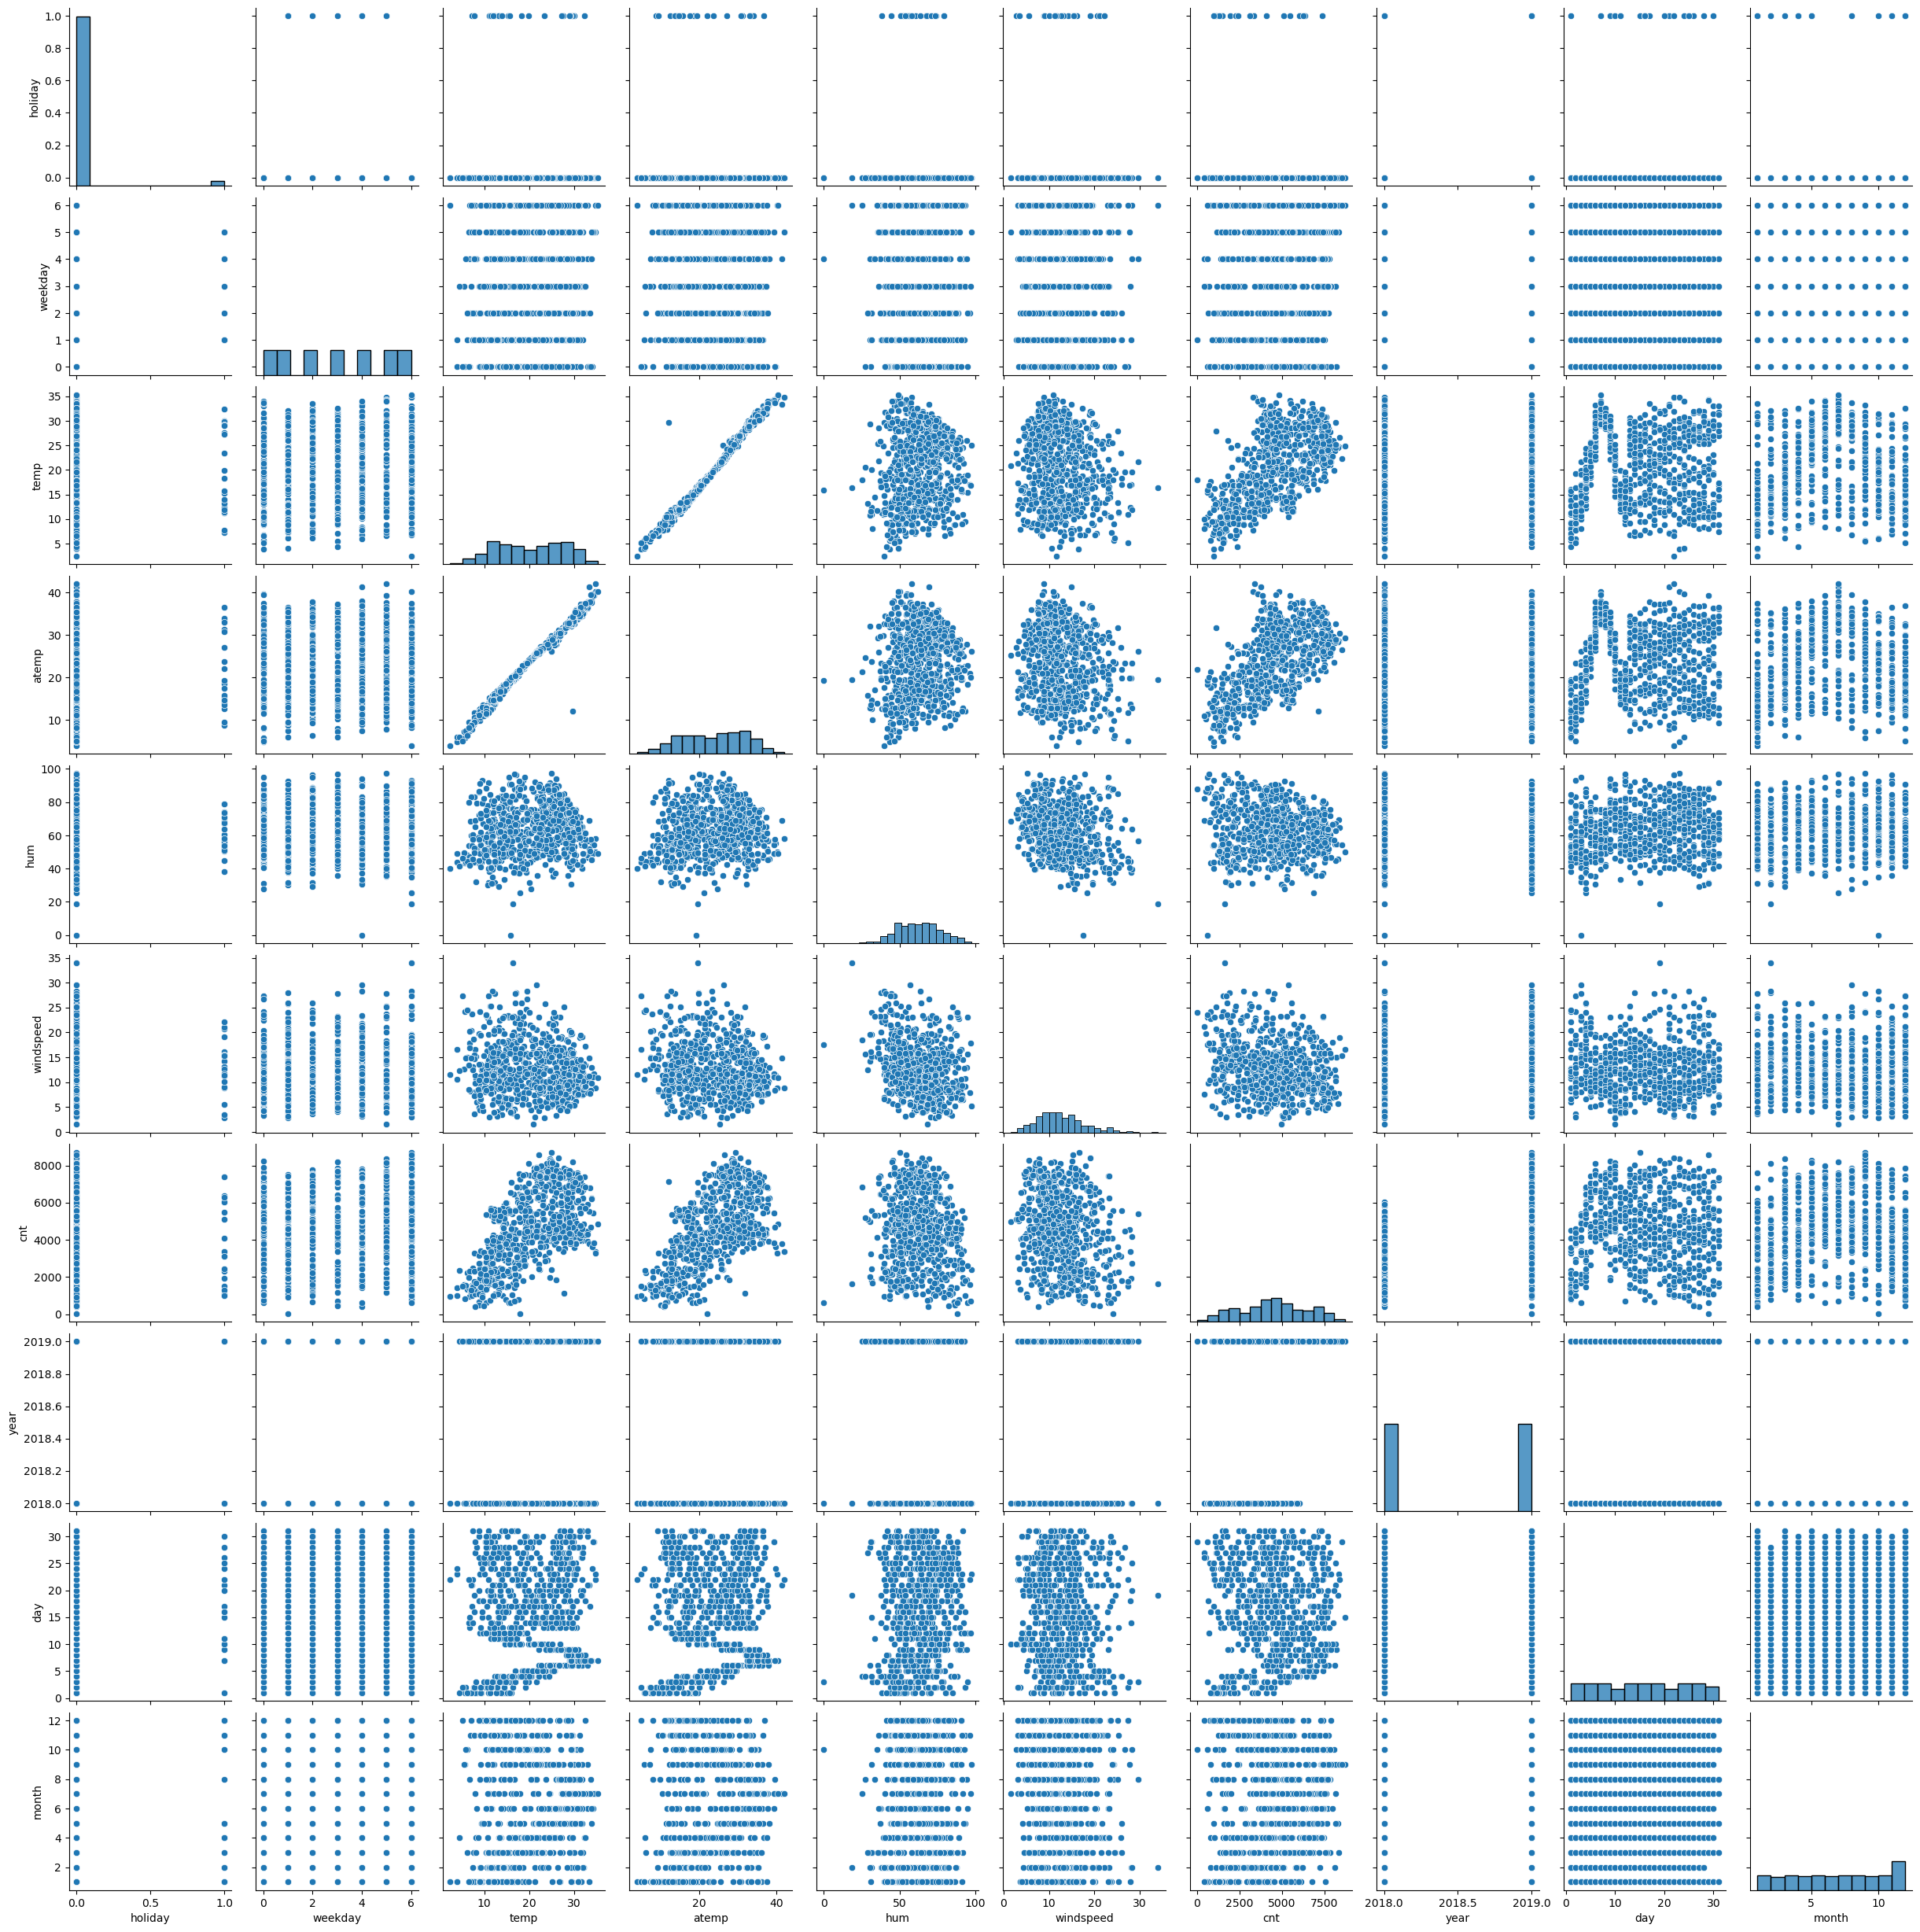

In [31]:
plt.figure(figsize=(80, 20))
sns.pairplot(bikesharing)
plt.show()

#### Step 5: Visualising Categorical Variables

As we have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables. 

- season : season (1:spring, 2:summer, 3:fall, 4:winter)- 	- workingday : if day is neither weekend nor holiday is 1, otherwise i-0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog in Celsius

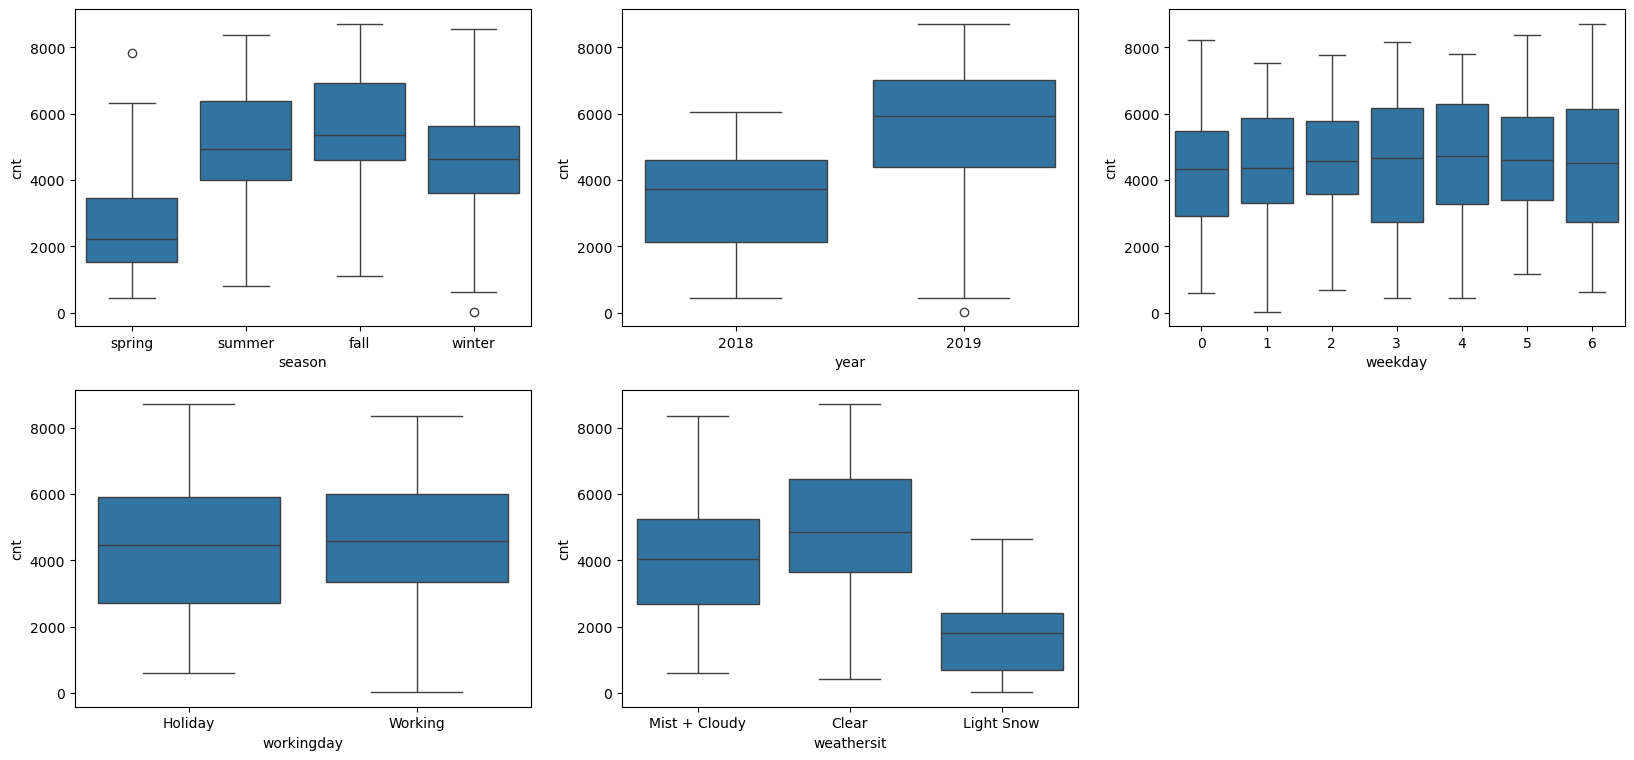

In [32]:
plt.figure(figsize=(20, 14 ))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = bikesharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()

From the above box plot we can infer that:
-    1. Season: During Summer, Fall and winter season, more number of bikes have been rented approximately 8000 and above.
-   2. yr(Year) : Compared to 2018, in 2019 more bikes have been rented i.e., more than 8000.
-  3. month : Bikes renting has been increased from February, it has grown till June again in July there was a little down fall. Then in August, September and october good number of bike have been rented  i.e, > 6000 and approximately greater than 8000. THere is adoenfall in November and December.
-    4. holiday: Irrespective of daya is a holiday or not, more than 6000 bike have been rented.
-    5. weekday : During all weekdays, bikes have been rented close to 8000.
-   6. weathersit: During Clear and Mist climate, close to 8000 bikes have been rented and it has reduced when the weather has Light Snow and no bikes have been rented when there is Heavy rainfall.
    

#### 5.Segmentation of data (1. Numeric, 2. Categorical (Ordered and Unordered)).

In [33]:
bikesharing.columns

Index(['dteday', 'season', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'year', 'day', 'month'],
      dtype='object')

In [34]:
# Numeric fields - temp, atemp,hum,windspeed,cnt
# Categorical -  season,weathersit, workingday
num_cols=["temp","atemp","hum","windspeed","cnt","year","day","month"]
cat_cols=["season","holiday","weekday","workingday","weathersit"]
extra_cols=["instant","date"]

In [35]:
bikesharing.drop('dteday',axis = 1,inplace = True)

In [36]:
bikesharing.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,day,month
0,spring,0,6,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018,1,1
1,spring,0,0,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018,1,2
2,spring,0,1,Working,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1,3
3,spring,0,2,Working,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1,4
4,spring,0,3,Working,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1,5


From the above correlation matrix we see that there is a string correlation between temp and atemp fields when compared to the other fields.

#### Step 6. Univariate Analysis

In [37]:
bikesharing['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

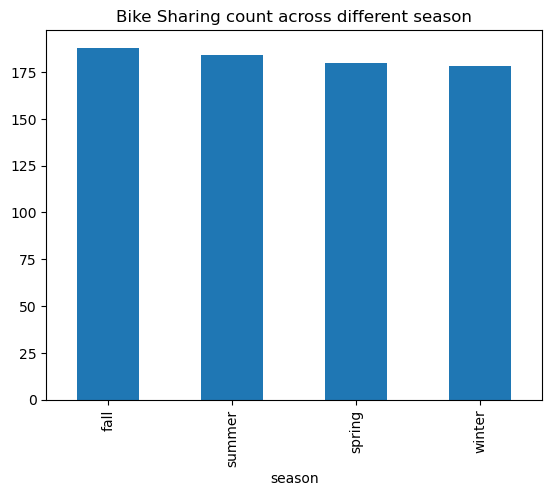

In [38]:
#Plotting bar chart to see the bike sharing count season wise.
# cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit","year","day","month"]
bikesharing['season'].value_counts().plot.bar()
plt.title("Bike Sharing count across different season")
plt.yticks(rotation=0)
plt.show()

##### From the above we can say that the bike's sharing is been approximately same during different seasons.

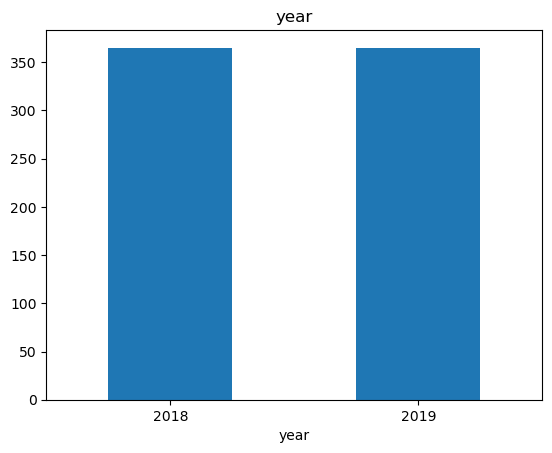

In [39]:
#Plotting bar chart to Bike Sharing in different years.
bikesharing['year'].value_counts().plot.bar()
plt.title("year")
plt.xticks(rotation=0)
plt.show()

##### From the above bar chart we see that the number of bike shared in 2018 and 2019 are approximately same.

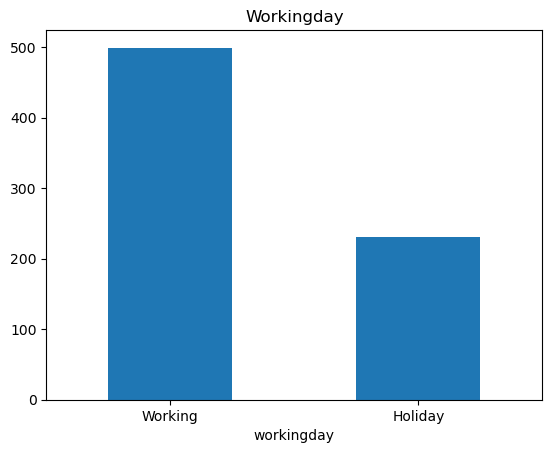

In [40]:
#Plotting bar chart to Bike Sharing on working days.
bikesharing['workingday'].value_counts().plot.bar()
plt.title("Workingday")
plt.xticks(rotation=0)
plt.show()

##### From the above plot, w can clearly say that bike riding done on working day is drastically high when compared to weenend or holiday.

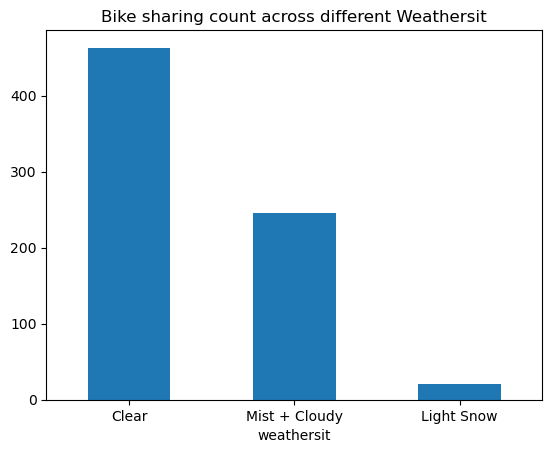

In [41]:
#Plotting bar chart to Bike Sharing in different weathersits.
bikesharing['weathersit'].value_counts().plot.bar()
plt.title("Bike sharing count across different Weathersit")
plt.xticks(rotation=0)
plt.show()

##### From the above plot on Weathersit below are the observations:
 - When the weather is Clear, bike renting is done more than 450.
 - When the weather is Mist+Cloudy, the bike rentin has reduced and it's falling beween 200 to 300.
 - When the weather is with Light Snow, the bike rides has dropped less than 100.
 - When there is a heavy rain, there is no bike ride at all.

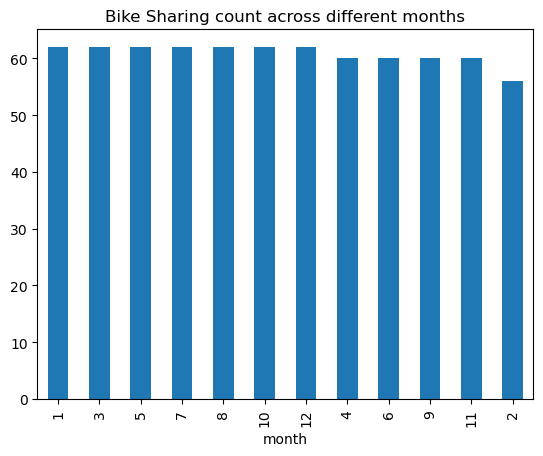

In [42]:
# cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit","year","day","month"]
bikesharing['month'].value_counts().plot.bar()
plt.title("Bike Sharing count across different months")
plt.yticks(rotation=0)
plt.show()

From the above map, we can say that biek renting is more than 50 irrecpective of the month and from January

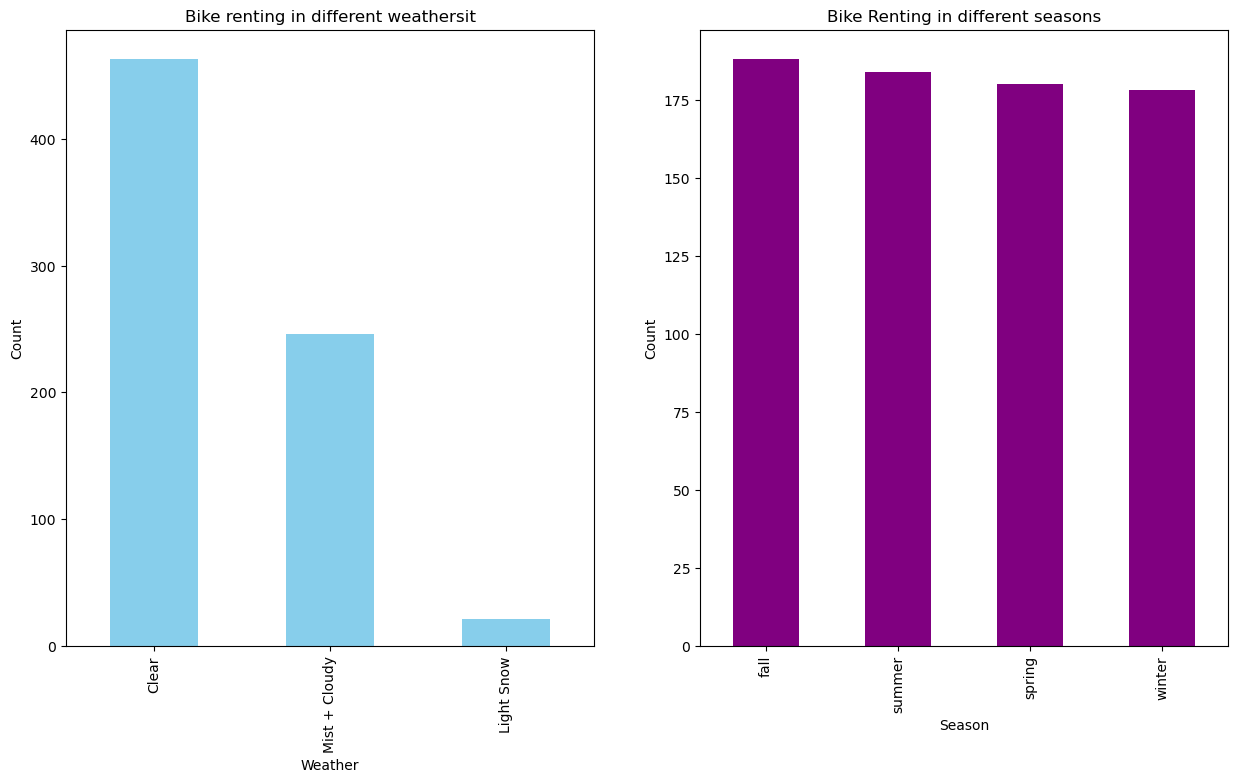

In [43]:
#Plotting bar chart to see the bike rides in different season.

# Create a 1x2 grid of subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Get the value counts for all weathers
value_counts = bikesharing['weathersit'].value_counts()

# Plot the bar chart for all loan applicants
value_counts.plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Bike renting in different weathersit')
axs[0].set_xlabel('Weather')
axs[0].set_ylabel('Count')



# Get the value counts for bike renting season wise

value_counts = bikesharing['season'].value_counts()

# Plot the bar chart for defaulters 
value_counts.plot.bar(ax=axs[1], color='purple')
axs[1].set_title('Bike Renting in different seasons')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Count')

plt.show()


#### Bivariate Analysis

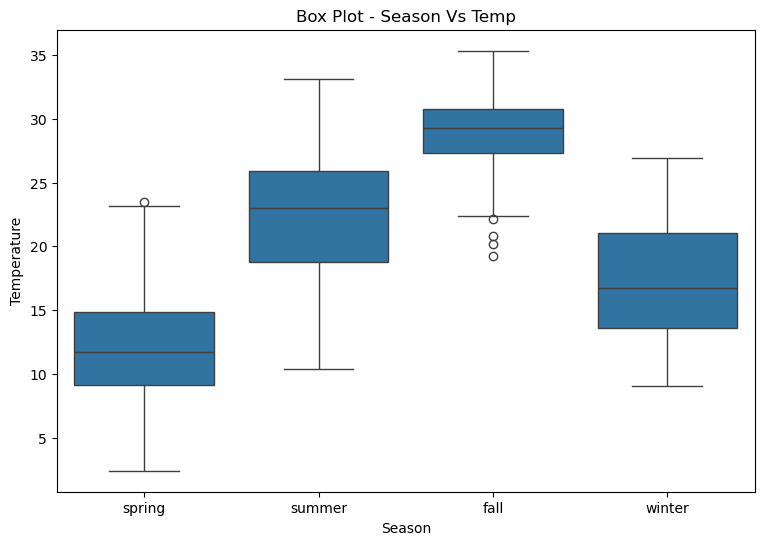

In [44]:
# season vs temp [Categorical vs Numerical]

plt.figure(figsize=[9,6])
sns.boxplot(x=bikesharing['season'], y=bikesharing['temp'])
plt.xlabel('Season')  # x-axis label
plt.ylabel('Temperature')     # y-axis label

# Add a title
plt.title('Box Plot - Season Vs Temp')

# Show the plot
plt.show()

##### From the above box plot we can say that Bike renting is all 4 season at different temperatures.
 - In Spring season, bike renting is done even when the temperature is less than 5 degree celcius.
 - In Summer season, biek renting is done when the minimum temepature was above 10 degress celcius.
 - During fall season, the minimum temperature was above 20 and max is above 30 degree celcius.
 - During winter season, the  minimum teperature was above 10 degress celcius.

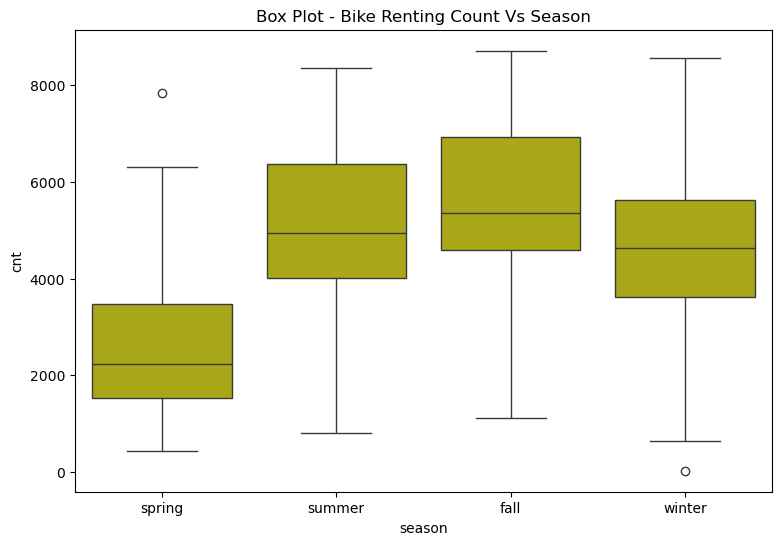

In [45]:
# Season vs cnt [Categorical vs Numerical]

plt.figure(figsize=[9,6])
sns.boxplot(y=bikesharing['cnt'], x=bikesharing['season'], color='y')
plt.xlabel('season')  # x-axis label
plt.ylabel('cnt')     # y-axis label

# Add a title
plt.title('Box Plot - Bike Renting Count Vs Season')

# Show the plot
plt.show()

##### From the above boxplot we can say that,
- during summer, fall and winter the rides were more than 6000.

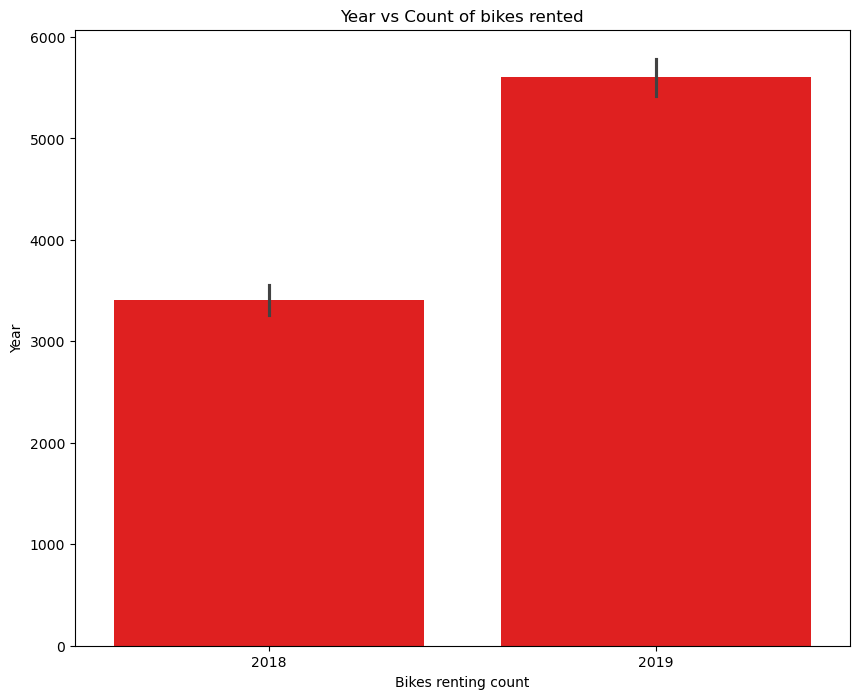

In [46]:
# cnt Vs year [Categorical vs Numerical]
plt.figure(figsize=(10, 8)) # width, height

sns.barplot(data =bikesharing,y='cnt', x='year',color = 'r')
plt.title('Year vs Count of bikes rented')
plt.xlabel('Bikes renting count')
plt.ylabel('Year')

plt.show()

##### From the above plot, we can say that,
- In 2018 the bike renting count was between 3000 to 4000.
- In 2019, the bike renting count was above 5000.

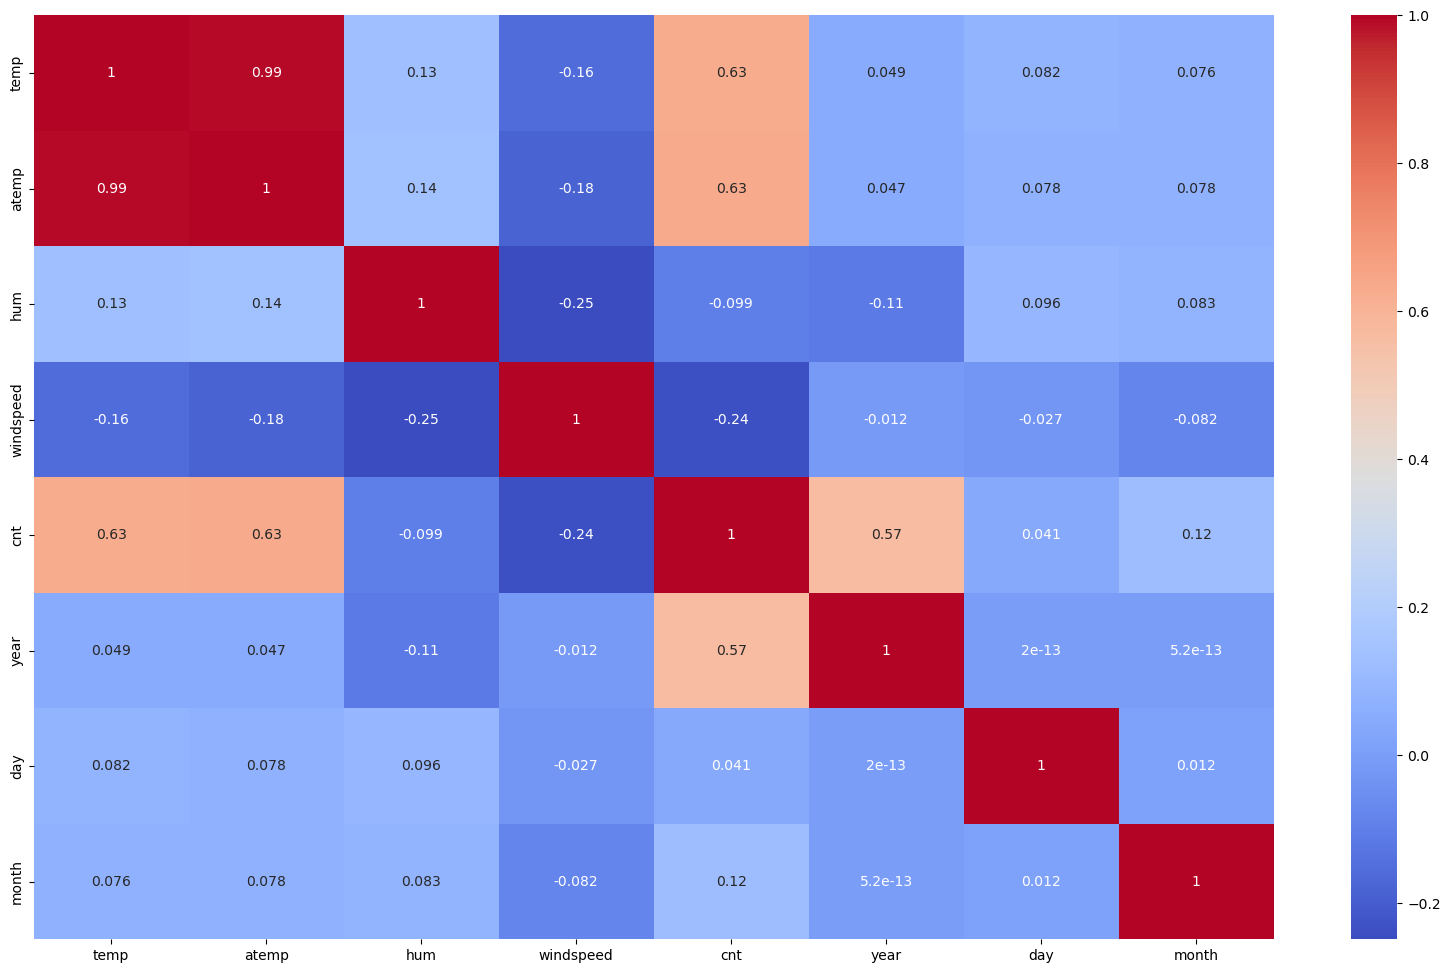

In [47]:
# Building correlation matrix to see the relationship between numeric variables
corr_matrix = bikesharing[num_cols].corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

##### From the above correlation matrix we see that there is a string correlation between temp and atemp fields when compared to the other fields.

## Step 7: Dummy variables creation for categorical data.

The variable `season`  and 'weathersit' has 4 level. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [48]:
bikesharing.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,day,month
0,spring,0,6,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018,1,1
1,spring,0,0,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018,1,2
2,spring,0,1,Working,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1,3
3,spring,0,2,Working,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1,4
4,spring,0,3,Working,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1,5


In [49]:
bikesharing_dummies = pd.get_dummies(bikesharing, columns=['season', 'workingday','weathersit'],dtype=int,drop_first=True)

In [50]:
bikesharing_dummies = bikesharing_dummies.loc[:, ~bikesharing_dummies.columns.duplicated()]


In [51]:
bikesharing_dummies.head()

,holiday,weekday,temp,atemp,hum,windspeed,cnt,year,day,month,season_spring,season_summer,season_winter,workingday_Working,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,6,14.110847,18.18125,80.5833,10.749882,985,2018,1,1,1,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,2018,1,2,1,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1,3,1,0,0,1,0,0
3,0,2,8.200000,10.60610,59.0435,10.739832,1562,2018,1,4,1,0,0,1,0,0
4,0,3,9.305237,11.46350,43.6957,12.522300,1600,2018,1,5,1,0,0,1,0,0


##### Dummies have created the approppriate int columns for season, working day and weathersit.

In [52]:
bikesharing_dummies.shape

(730, 16)

In [53]:
bikesharing.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,day,month
0,spring,0,6,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018,1,1
1,spring,0,0,Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018,1,2
2,spring,0,1,Working,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1,3
3,spring,0,2,Working,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1,4
4,spring,0,3,Working,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1,5


In [54]:
# Drop 'workingday',weathersit and seasons as we have created the dummies for it

#bikesharing.drop(['season','workingday','weathersit'], axis = 1, inplace = True)

In [55]:
#bikesharing.head()

## Step 8: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [56]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing_dummies, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Here we can see that few of the fields like `registered, casual,temp,atemp,humidity,windspeed` has values more than 1, and all the categorical columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So we will use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
bikesharing_dummies.head()

,holiday,weekday,temp,atemp,hum,windspeed,cnt,year,day,month,season_spring,season_summer,season_winter,workingday_Working,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,6,14.110847,18.18125,80.5833,10.749882,985,2018,1,1,1,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,2018,1,2,1,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1,3,1,0,0,1,0,0
3,0,2,8.200000,10.60610,59.0435,10.739832,1562,2018,1,4,1,0,0,1,0,0
4,0,3,9.305237,11.46350,43.6957,12.522300,1600,2018,1,5,1,0,0,1,0,0


In [60]:
bikesharing_dummies.columns

Index(['holiday', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'year', 'day', 'month', 'season_spring', 'season_summer',
       'season_winter', 'workingday_Working', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [61]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum' ,'windspeed','cnt','year','month','day']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [62]:
df_train.head()

,holiday,weekday,temp,atemp,hum,windspeed,cnt,year,day,month,season_spring,season_summer,season_winter,workingday_Working,weathersit_Light Snow,weathersit_Mist + Cloudy
653,0,2,0.509887,0.501133,0.575354,0.300794,0.864243,1.0,0.500000,0.818182,0,0,1,1,0,0
576,0,2,0.815169,0.766351,0.725633,0.264686,0.827658,1.0,1.000000,0.545455,0,0,0,1,0,0
426,0,6,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.066667,0.181818,1,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.966667,1.000000,1,0,0,0,0,0
482,0,6,0.395666,0.391735,0.504508,0.188475,0.482973,1.0,0.900000,0.272727,0,1,0,0,0,1


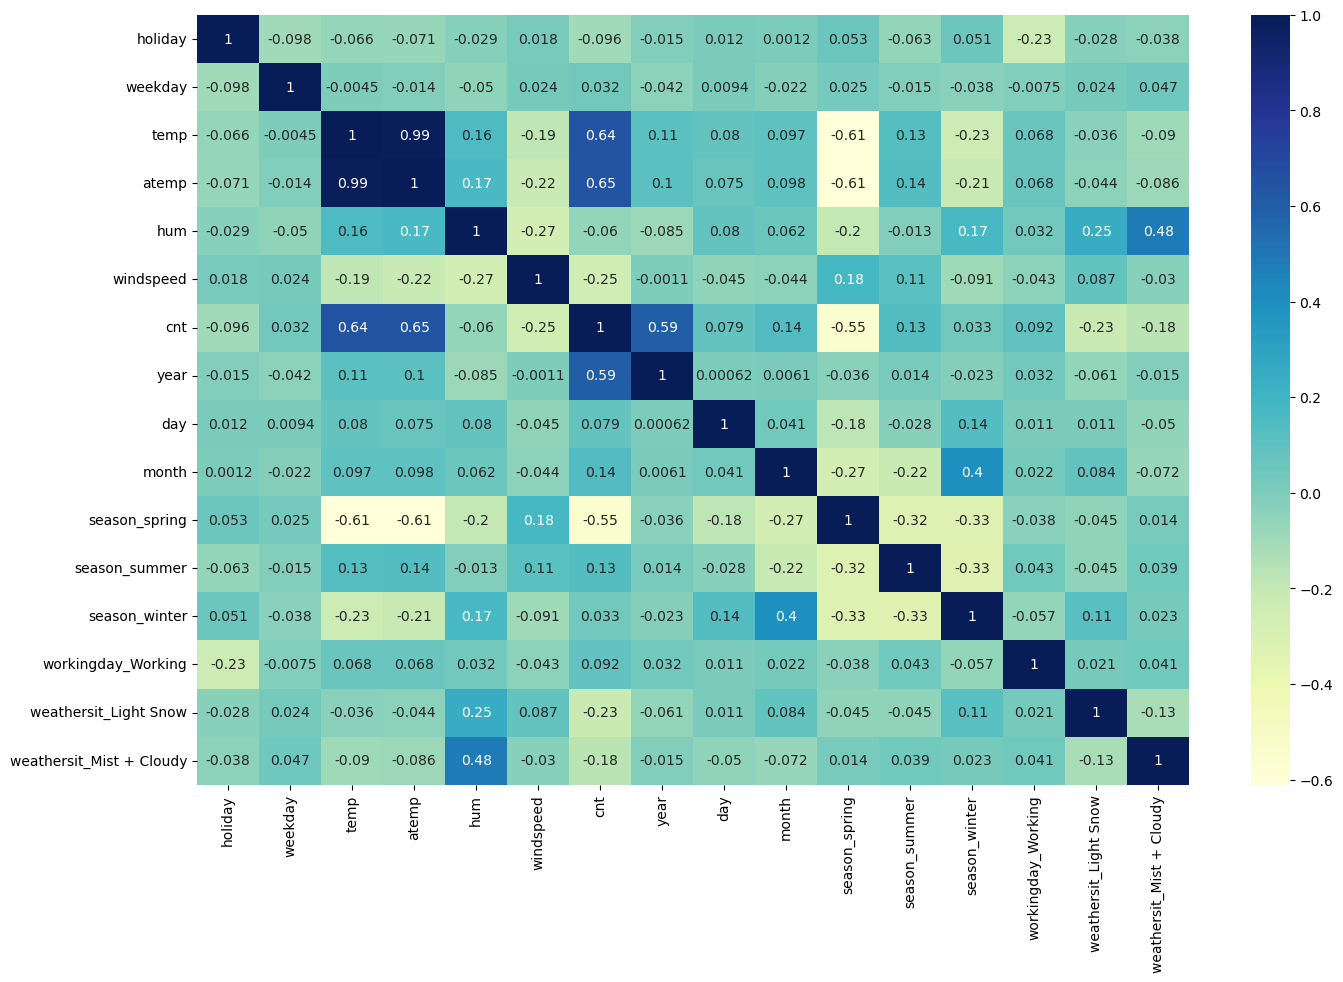

In [63]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### From the above correlation map, we can see that temp and atemp are highly correlated and high negative correlation between working day and holiday

As the correlation is high between temp and atemp, let us see the pair plot between temp and atemp

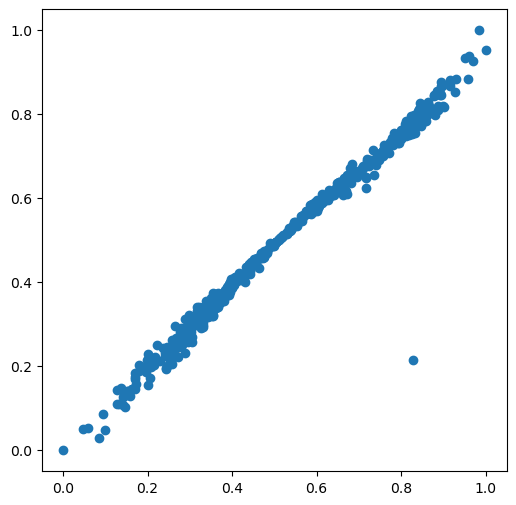

In [64]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.atemp)
plt.show()

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building


In [65]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [66]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [67]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

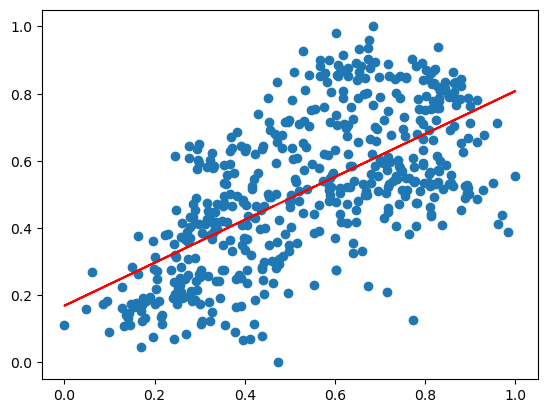

In [68]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169+ 0.639*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [69]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           5.80e-61
Time:                        18:12:59   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable

The R-squared value obtained is `0.414`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `atemp`.

In [70]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'atemp']]

In [71]:
bikesharing.columns

Index(['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'year', 'day', 'month'],
      dtype='object')

In [72]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                       0.246826
holiday                    -0.063274
weekday                     0.008202
temp                        0.437409
atemp                       0.056820
hum                        -0.121512
windspeed                  -0.178190
year                        0.232047
day                        -0.009961
month                       0.008112
season_spring              -0.075716
season_summer               0.042856
season_winter               0.087352
workingday_Working          0.018625
weathersit_Light Snow      -0.249965
weathersit_Mist + Cloudy   -0.058935
dtype: float64

In [73]:
# Print the summary of the model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.71e-181
Time:                        18:12:59   Log-Likelihood:                 496.30
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     494   BIC:                            -892.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.829` from `0.414`.

In [74]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                       0.246826
holiday                    -0.063274
weekday                     0.008202
temp                        0.437409
atemp                       0.056820
hum                        -0.121512
windspeed                  -0.178190
year                        0.232047
day                        -0.009961
month                       0.008112
season_spring              -0.075716
season_summer               0.042856
season_winter               0.087352
workingday_Working          0.018625
weathersit_Light Snow      -0.249965
weathersit_Mist + Cloudy   -0.058935
dtype: float64

In [75]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.71e-181
Time:                        18:12:59   Log-Likelihood:                 496.30
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     494   BIC:                            -892.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Looking at the p-values, we are clearly say that all the variables are highly significant expect the variable season_spring as the P-value is greater than 0.5

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,380.44
3,atemp,367.58
4,hum,29.12
5,windspeed,5.02
8,month,4.35
9,season_spring,3.97
7,day,3.87
11,season_winter,3.61
12,workingday_Working,3.22
1,weekday,3.13


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `temp`, atemp,hum  as it has a very high VIF-value. Let's go ahead and drop this variables

In [78]:
X = X_train.drop('hum',axis = 1, inplace = True)



In [79]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const                       0.185529
holiday                    -0.063343
weekday                     0.008826
temp                        0.431654
atemp                       0.035612
windspeed                  -0.154669
year                        0.235007
day                        -0.014074
month                       0.008363
season_spring              -0.082644
season_summer               0.038824
season_winter               0.077267
workingday_Working          0.019037
weathersit_Light Snow      -0.284171
weathersit_Mist + Cloudy   -0.078981
dtype: float64

In [80]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.52e-180
Time:                        18:12:59   Log-Likelihood:                 491.34
No. Observations:                 510   AIC:                            -952.7
Df Residuals:                     495   BIC:                            -889.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,376.73
3,atemp,366.41
4,windspeed,4.94
7,month,4.30
6,day,3.68
11,workingday_Working,3.19
1,weekday,3.13
10,season_winter,2.58
8,season_spring,2.47
5,year,2.07


In [82]:
X = X_train.drop('atemp',axis = 1, inplace = True)

In [83]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const                       0.185775
holiday                    -0.063633
weekday                     0.008798
temp                        0.465517
windspeed                  -0.156058
year                        0.234957
day                        -0.014236
month                       0.008312
season_spring              -0.082047
season_summer               0.039485
season_winter               0.078110
workingday_Working          0.019025
weathersit_Light Snow      -0.284498
weathersit_Mist + Cloudy   -0.078984
dtype: float64

In [84]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.13e-181
Time:                        18:12:59   Log-Likelihood:                 491.31
No. Observations:                 510   AIC:                            -954.6
Df Residuals:                     496   BIC:                            -895.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.21
3,windspeed,4.72
6,month,4.30
5,day,3.68
10,workingday_Working,3.19
1,weekday,3.12
9,season_winter,2.38
7,season_spring,2.35
4,year,2.07
8,season_summer,1.88


Now as you can see, the VIFs and p-values both are within an acceptable range except for temp which is 7. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [86]:
y_train_cnt = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

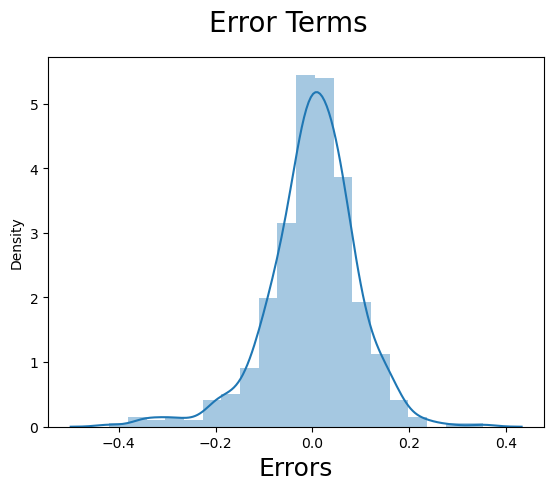

In [87]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [88]:
num_vars =  ['temp','atemp','hum' ,'windspeed','cnt','year','month','day']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [89]:
df_test.describe()

,holiday,weekday,temp,atemp,hum,windspeed,cnt,year,day,month,season_spring,season_summer,season_winter,workingday_Working,weathersit_Light Snow,weathersit_Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,3.018265,0.558941,0.532991,0.638508,0.313350,0.520592,0.479452,0.497565,0.506019,0.255708,0.264840,0.232877,0.698630,0.027397,0.319635
std,0.188034,1.988415,0.233698,0.217888,0.148974,0.159947,0.218435,0.500722,0.290688,0.300491,0.437258,0.442259,0.423633,0.459904,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.266667,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.466667,0.545455,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,5.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.766667,0.727273,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,6.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [90]:
y_test = df_test.pop('cnt')
X_test = df_test

In [91]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [92]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["hum", "atemp"], axis = 1)

In [93]:
# Making predictions using the fourth model

y_pred = lr_3.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

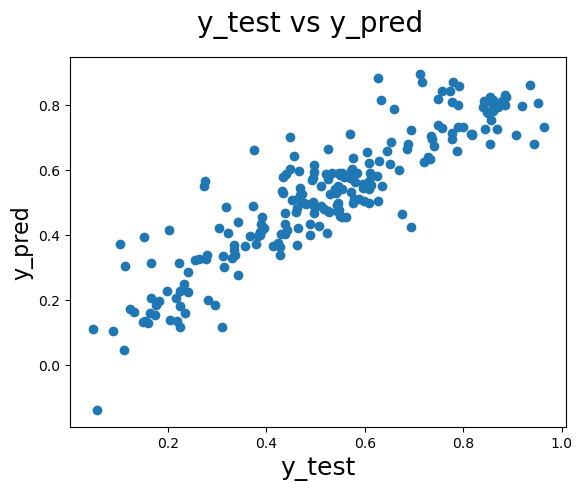

In [94]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8058226314266242